In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from SIRData import SIRG
sig = SIRG(N = 1024)
N=2000


traj=[]
length=[]
for i in range(N):
    a = sig.simulate_single(y0=[0.1,0], time_max=4, time_step=0.001, rng=None)
    traj.append(a)
    length.append(len(a))
print(a.shape) 

time = np.linspace(0,4,4001)
print(time.shape)  

(1859, 3)
(4001,)


In [2]:
traj_true = np.vstack(traj)
true_max_value=np.zeros([N])
true_max_time=np.zeros([N])
for i in range(N):
    ind = traj[i][:, 1].argmax()
    true_max_value[i] = traj[i][ind, 1]
    true_max_time[i] = traj[i][ind, 0]

print(true_max_value.mean())
print(true_max_time.mean())

def maxI_mean(tr):
    pre_max_value=np.zeros([N])
    for i in range(N):
        pre_max_value[i] = tr[:, i, 0].max() 
    return pre_max_value.mean(), abs(pre_max_value.mean() - true_max_value.mean())


N=2000
x0=torch.tensor([[0.1,0.]*N]).reshape(-1,2)
seed=6



max_value=np.zeros([3, seed])
max_value_error=np.zeros([3, seed])
for ind, h in enumerate([0.05, 0.1, 0.2]):
    for j in range(seed):
        local = 'outputs/kmc{}_seed{}/model_best.pkl'.format(h, j)
        Net = torch.load(local, map_location='cpu')
        with torch.no_grad():
            tr = Net.predict(x0=x0, h=0.001, steps=4000, returnnp=True)
        max_value[ind, j], max_value_error[ind, j] = maxI_mean(tr)
        print(h, j, max_value[ind, j], max_value_error[ind, j])
print(h,max_value, max_value_error)
   
    

max_value_em=np.zeros([3, seed])
max_value_error_em=np.zeros([3, seed])
for ind, h in enumerate([0.05, 0.1, 0.2]):
    for j in range(seed):
        local = 'outputs/kmc{}em_seed{}/model_best.pkl'.format(h, j)
        Net = torch.load(local, map_location='cpu')
        with torch.no_grad():
            tr = Net.predict(x0=x0, h=0.001, steps=4000, returnnp=True)
        max_value_em[ind, j], max_value_error_em[ind, j] = maxI_mean(tr)
        print('EM', h, j, max_value_em[ind, j], max_value_error_em[ind, j])
print(h,max_value_em, max_value_error_em)

0.43871728515625
1.0983360950291294
0.05 0 0.4370419286340475 0.0016753565222025202
0.05 1 0.43685087467730044 0.0018664104789495872
0.05 2 0.4383626033961773 0.0003546817600727503
0.05 3 0.4355398922264576 0.003177392929792411
0.05 4 0.4330612769126892 0.005656008243560828
0.05 5 0.4353468670547008 0.0033704181015491996
0.1 0 0.4370306110084057 0.001686674147844347
0.1 1 0.4352182020992041 0.0034990830570459375
0.1 2 0.4368276679366827 0.0018896172195673189
0.1 3 0.43704823108017443 0.0016690540760755934
0.1 4 0.43612860490381716 0.0025886802524328623
0.1 5 0.4363480087518692 0.002369276404380838
0.2 0 0.43865500728785994 6.227786839008154e-05
0.2 1 0.43975344420969487 0.0010361590534448406
0.2 2 0.43790957279503345 0.0008077123612165726
0.2 3 0.4380951336324215 0.0006221515238285513
0.2 4 0.44040073369443417 0.0016834485381841402
0.2 5 0.43865057148039344 6.671367585658894e-05
0.2 [[0.43704193 0.43685087 0.4383626  0.43553989 0.43306128 0.43534687]
 [0.43703061 0.4352182  0.43682767 

In [3]:
traj_true = np.vstack(traj)
mean_true = np.zeros([4001, 2])
i=1
mean_true[0]=[0.1, 0]
for i in range(1,4001):
    mean_true[i] = (traj_true[(traj_true[:, 0]>0.001*(i-1))&(traj_true[:, 0]<0.001*i), :].mean(axis=0))[1:]
print(mean_true.shape)

h=0.05
j=0
local = 'outputs/kmc{}em_seed{}/model_best.pkl'.format(h, j)
Net = torch.load(local, map_location='cpu')
with torch.no_grad():
    trem05 = Net.predict(x0=x0, h=0.001, steps=4000, returnnp=True)
print(trem05.shape)
local = 'outputs/kmc{}_seed{}/model_best.pkl'.format(h, j)
Net = torch.load(local, map_location='cpu')
with torch.no_grad():
    trdgma05 = Net.predict(x0=x0, h=0.001, steps=4000, returnnp=True)
print(trdgma05.shape)

h=0.1
local = 'outputs/kmc{}em_seed{}/model_best.pkl'.format(h, j)
Net = torch.load(local, map_location='cpu')
with torch.no_grad():
    trem1 = Net.predict(x0=x0, h=0.001, steps=4000, returnnp=True)
print(trem1.shape)
    
    
local = 'outputs/kmc{}_seed{}/model_best.pkl'.format(h, j)
Net = torch.load(local, map_location='cpu')
with torch.no_grad():
    trdgma1 = Net.predict(x0=x0, h=0.001, steps=4000, returnnp=True)
print(trdgma1.shape)
    
h=0.2
local = 'outputs/kmc{}em_seed{}/model_best.pkl'.format(h, j)
Net = torch.load(local, map_location='cpu')
with torch.no_grad():
    trem2 = Net.predict(x0=x0, h=0.001, steps=4000, returnnp=True)
print(trem2.shape)

local = 'outputs/kmc{}_seed{}/model_best.pkl'.format(h, j)
Net = torch.load(local, map_location='cpu')
with torch.no_grad():
    trdgma2 = Net.predict(x0=x0, h=0.001, steps=4000, returnnp=True)
print(trdgma2.shape)

(4001, 2)
(4001, 2000, 2)
(4001, 2000, 2)
(4001, 2000, 2)
(4001, 2000, 2)
(4001, 2000, 2)
(4001, 2000, 2)


[[1.67535652e-03 1.86641048e-03 3.54681760e-04 3.17739293e-03
  5.65600824e-03 3.37041810e-03]
 [1.68667415e-03 3.49908306e-03 1.88961722e-03 1.66905408e-03
  2.58868025e-03 2.36927640e-03]
 [6.22778684e-05 1.03615905e-03 8.07712361e-04 6.22151524e-04
  1.68344854e-03 6.67136759e-05]]
[0.00268338 0.00228373 0.00071308]
[[0.01317137 0.01426172 0.01453138 0.01400258 0.01310649 0.01468796]
 [0.02565332 0.0247878  0.02551796 0.02430453 0.02464393 0.02649781]
 [0.04935949 0.04686513 0.04752373 0.04850375 0.0475821  0.04695519]]


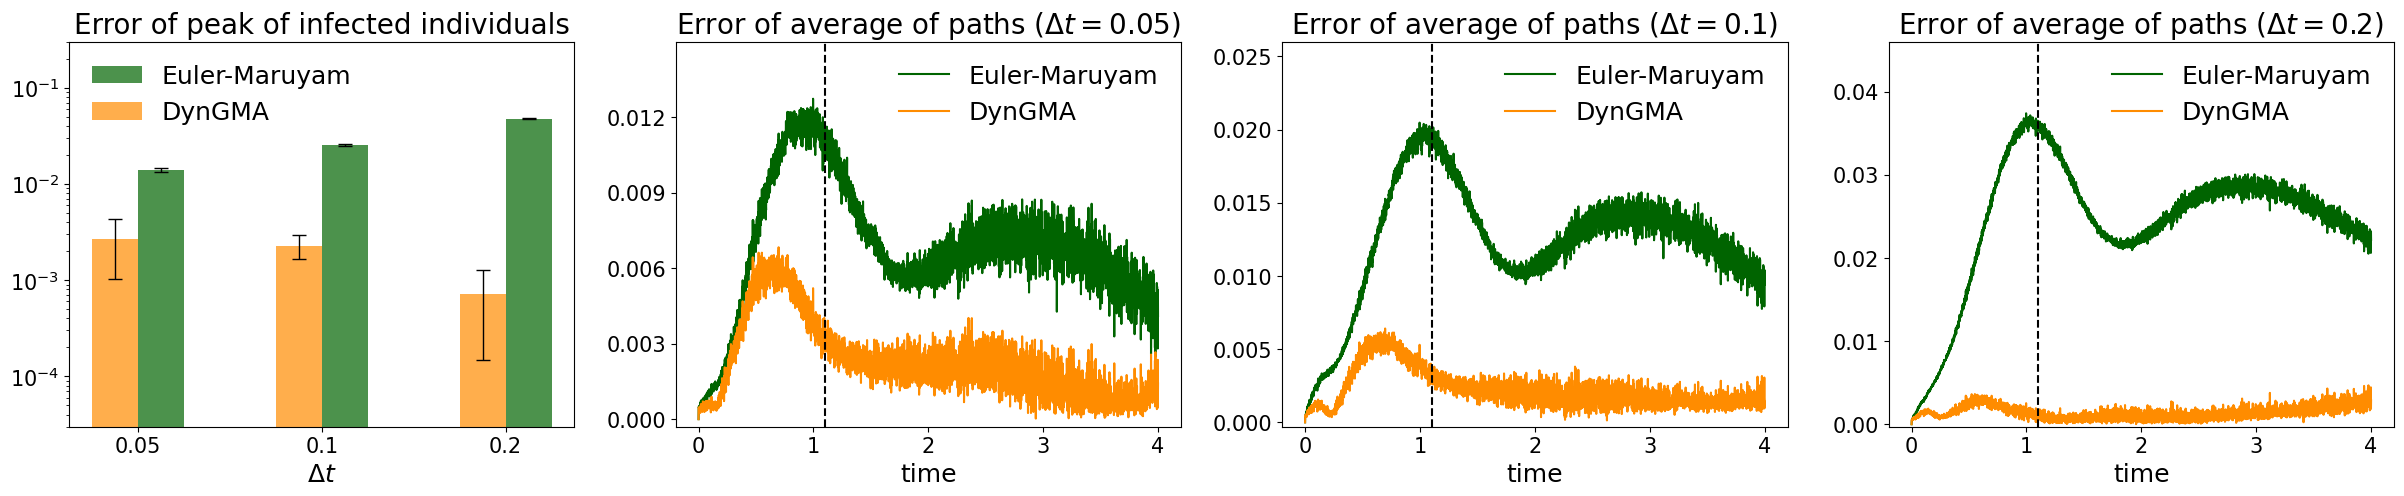

In [9]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(1,4, figsize=(30,5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
    wspace=0.2, hspace=0.12)
error_kw = {"elinewidth":1, "ecolor":"black", "capsize":5}
width = 0.25 
x = np.arange(3)
print(max_value_error)
print(max_value_error.mean(-1))
print(max_value_error_em)
ax[0].bar(x[:]+width, max_value_error_em.mean(-1), yerr =max_value_error_em.std(-1),
          error_kw= error_kw, width=width,
          color='darkgreen', alpha=0.7, label='Euler-Maruyam')
ax[0].bar(x[:], max_value_error.mean(-1), yerr =max_value_error.std(-1), 
          error_kw= error_kw, width=width,
          color='darkorange', alpha=0.7, label='DynGMA')

ax[0].set_yscale('log')
ax[0].set_ylim(0.00003,0.3)

shops = ["0.05", "0.1", "0.2"] 
xticks = np.arange(3)+width/2
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(shops)
ax[0].set_xlabel(r'$\Delta t$', fontsize=18)


ax[0].legend(loc='upper left', fontsize=18, frameon=False, ncol=1) 



def mean_error(tr):
    pre_m = tr.mean(axis=1)
    error = pre_m - mean_true
    return np.sqrt((error**2).mean(-1))
time = np.linspace(0,4,4001)
 

ax[1].plot(time, mean_error(trem05), label='Euler-Maruyam', color='darkgreen')
ax[1].plot(time, mean_error(trdgma05),label='DynGMA', color='darkorange')
ax[1].set_ylim(-0.0003,0.015)
ax[1].set_yticks([0,0.003, 0.006, 0.009, 0.012])

ax[2].plot(time, mean_error(trem1), label='Euler-Maruyam', color='darkgreen')
ax[2].plot(time, mean_error(trdgma1),label='DynGMA', color='darkorange')
ax[2].set_ylim(-0.0003,0.026)

ax[3].plot(time, mean_error(trem2), label='Euler-Maruyam', color='darkgreen')
ax[3].plot(time, mean_error(trdgma2),label='DynGMA', color='darkorange')
ax[3].set_ylim(-0.0003,0.046)

for i in range(4):
    ax[i].tick_params(labelsize=15)
for i in range(1, 4):    
    ax[i].set_xlabel('time', fontsize=18) 
    ax[i].axvline(x=1.1020928713956213, color='k', linestyle='--')
    ax[i].legend(loc='upper right', fontsize=18, frameon=False, ncol=1) 

ax[0].set_title('Error of peak of infected individuals', fontsize=20, loc= 'center') 
ax[1].set_title('Error of average of paths ($\Delta t=0.05$)', fontsize=20, loc= 'center') 
ax[2].set_title('Error of average of paths ($\Delta t=0.1$)', fontsize=20, loc= 'center') 
ax[3].set_title('Error of average of paths ($\Delta t=0.2$)', fontsize=20, loc= 'center') 
fig.savefig('kmc_error.pdf', bbox_inches='tight', dpi=100)

In [5]:
# local = 'outputs/kmc0.1em_seed0/model_best.pkl'
# Net = torch.load(local, map_location='cpu')
# with torch.no_grad():
#     trem0 = Net.predict(x0=x0, h=0.01, steps=400, returnnp=True)
# import matplotlib.pyplot as plt
# print(trem0.shape)


# local = 'outputs/kmc0.05em_seed0/model_best.pkl'
# Net = torch.load(local, map_location='cpu')
# with torch.no_grad():
#     trem1 = Net.predict(x0=x0, h=0.01, steps=400, returnnp=True)
# import matplotlib.pyplot as plt
# print(trem1.shape)


local = 'outputs/kmc0.05_seed0/model_best.pkl'
Net = torch.load(local, map_location='cpu')
with torch.no_grad():
    tr0 = Net.predict(x0=x0, h=0.01, steps=400, returnnp=True)
import matplotlib.pyplot as plt
print(tr0.shape)


local = 'outputs/kmc0.1_seed0/model_best.pkl'
Net = torch.load(local, map_location='cpu')
with torch.no_grad():
    tr1 = Net.predict(x0=x0, h=0.01, steps=400, returnnp=True)
import matplotlib.pyplot as plt
print(tr1.shape)

local = 'outputs/kmc0.2_seed0/model_best.pkl'
Net = torch.load(local, map_location='cpu')
with torch.no_grad():
    tr2 = Net.predict(x0=x0, h=0.01, steps=400, returnnp=True)
import matplotlib.pyplot as plt
print(tr2.shape)

(401, 2000, 2)
(401, 2000, 2)
(401, 2000, 2)


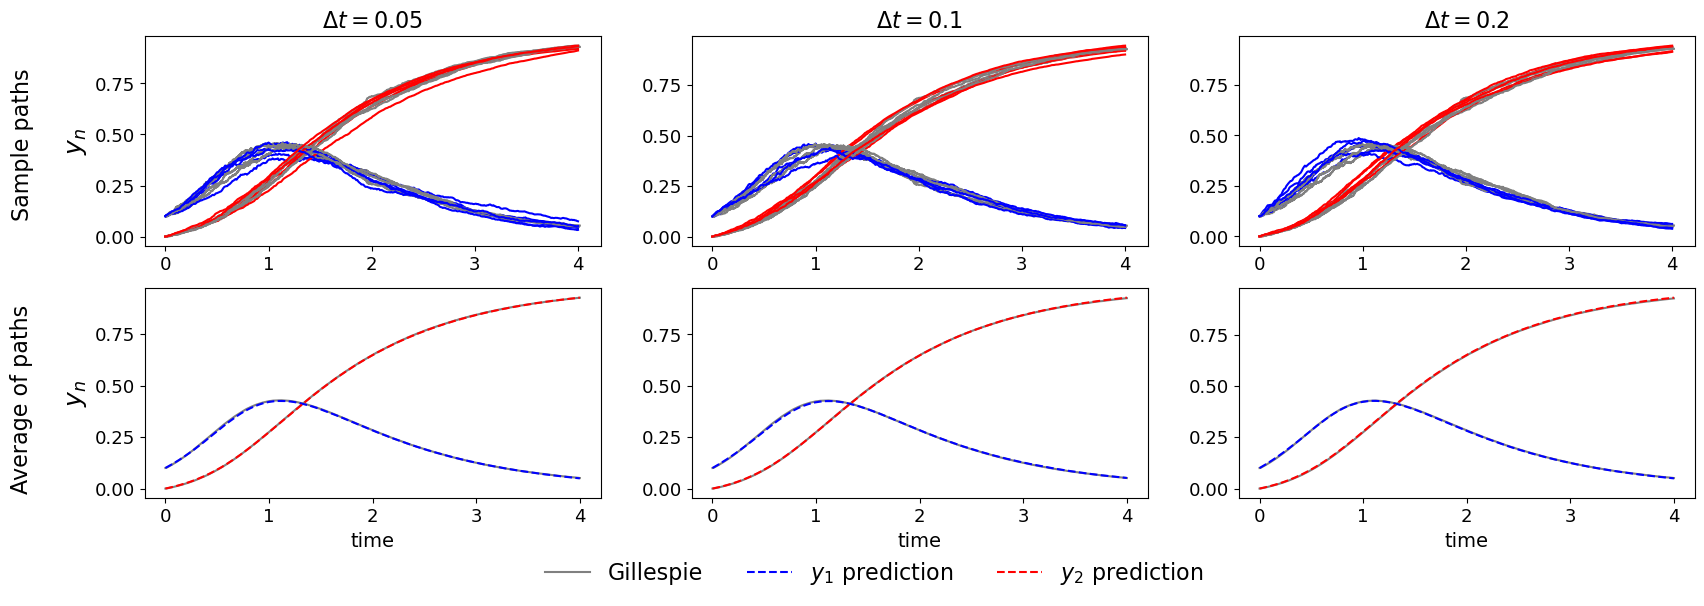

In [6]:
fig, ax=plt.subplots(2,3, figsize=(20,6))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
        wspace=0.2, hspace=0.2)
traj = np.vstack(traj)
time = np.linspace(0,4,401)
ind=0
for i in range(5):
    #plot gillespie
    ax[0, 0].plot(traj[ind:ind+int(length[i]),0], traj[ind:ind+int(length[i]),1], color='gray', label='Gillespie')
    ax[0, 0].plot(traj[ind:ind+int(length[i]),0], traj[ind:ind+int(length[i]),2], color='gray') 
    ax[0, 1].plot(traj[ind:ind+int(length[i]),0], traj[ind:ind+int(length[i]),1], color='gray', label='Gillespie')
    ax[0, 1].plot(traj[ind:ind+int(length[i]),0], traj[ind:ind+int(length[i]),2], color='gray') 
    
    ax[0, 2].plot(traj[ind:ind+int(length[i]),0], traj[ind:ind+int(length[i]),1], color='gray', label='Gillespie')
    ax[0, 2].plot(traj[ind:ind+int(length[i]),0], traj[ind:ind+int(length[i]),2], color='gray') 
    ind=ind+int(length[i])
    
    # plot prediction
    ax[0, 0].plot(time, tr0[:,i, 0], color='blue', label='$y_1$ prediction')
    ax[0, 0].plot(time, tr0[:,i, 1], color='red', label='$y_2$ prediction')

    ax[0, 1].plot(time, tr1[:,i, 0], color='blue', label='$y_1$ prediction')
    ax[0, 1].plot(time, tr1[:,i, 1], color='red', label='$y_2$ prediction')

    ax[0, 2].plot(time, tr2[:,i, 0], color='blue', label='$y_1$ prediction')
    ax[0, 2].plot(time, tr2[:,i, 1], color='red', label='$y_2$ prediction')

    
mean = np.zeros([401, 2])
mean[0]=[0.1, 0]
for i in range(1,401):
    mean[i] = (traj[(traj[:, 0]>0.01*(i-1))&(traj[:, 0]<0.01*i), :].mean(axis=0))[1:]
ax[1, 0].plot(time, mean[:, 0], color='gray', label='Gillespie')
ax[1, 0].plot(time, mean[:, 1], color='gray')

ax[1, 1].plot(time, mean[:, 0], color='gray', label='Gillespie')
ax[1, 1].plot(time, mean[:, 1], color='gray')

ax[1, 2].plot(time, mean[:, 0], color='gray', label='Gillespie')
ax[1, 2].plot(time, mean[:, 1], color='gray')

pre_m = tr0.mean(axis=1)
ax[1, 0].plot(time, pre_m[:, 0], color='blue', linestyle='--', label='$y_1$ prediction')
ax[1, 0].plot(time, pre_m[:, 1], color='red', linestyle='--', label='$y_2$ prediction')

pre_m = tr1.mean(axis=1)
ax[1, 1].plot(time, pre_m[:, 0], color='blue', linestyle='--', label='$y_1$ prediction')
ax[1, 1].plot(time, pre_m[:, 1], color='red', linestyle='--', label='$y_2$ prediction')

pre_m = tr2.mean(axis=1)
ax[1, 2].plot(time, pre_m[:, 0], color='blue', linestyle='--', label='$y_1$ prediction')
ax[1, 2].plot(time, pre_m[:, 1], color='red', linestyle='--', label='$y_2$ prediction')

for i in range(3):
    ax[0, i].tick_params(labelsize=13)
    ax[1, i].tick_params(labelsize=13)
    ax[1, i].set_xlabel('time', fontsize=14) 

ax[0, 0].set_title('$\Delta t=0.05$', fontsize=16, loc= 'center') 
ax[0, 1].set_title('$\Delta t=0.1$', fontsize=16, loc= 'center') 
ax[0, 2].set_title('$\Delta t=0.2$', fontsize=16, loc= 'center') 

ax[0, 0].text(-1.5, 0.1, 'Sample paths', fontsize=16, rotation='vertical')
ax[1, 0].text(-1.5, 0, 'Average of paths', fontsize=16, rotation='vertical')


ax[1, 1].legend(loc='upper center', bbox_to_anchor=(0.4, -0.2), 
           fontsize=16, frameon=False, ncol=3) 
ax[0, 0].set_ylabel('$y_n$', fontsize=18)
ax[1, 0].set_ylabel('$y_n$', fontsize=18)

fig.savefig('kmc_traj.pdf', bbox_inches='tight', dpi=100)

0.013000000000000001 100
0.013000000000000001 100
0.013000000000000001 100


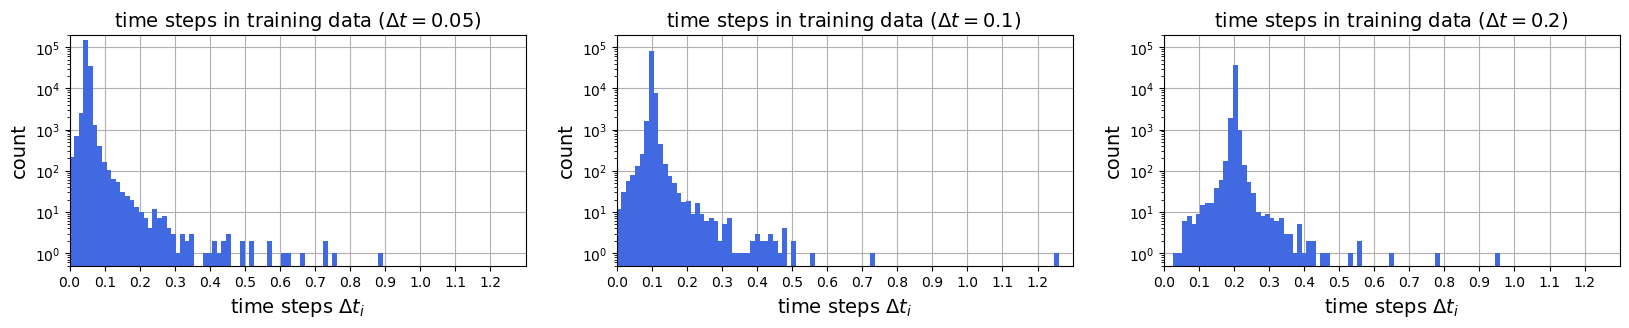

In [7]:
import torch
from kmcData import kmcData

data = kmcData(num_traj=12500, time_max=1, time_step=0.1)
y = data.y_train
time=y[0,:,0]

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


from kmcData import kmcData

def plot_h(time, ax):
    data = (time)

    res_freq = stats.relfreq(data, numbins=100, defaultreallimits=[0, 1.3])
    # 计算结果
    pdf_value = res_freq.frequency
    cdf_value = np.cumsum(res_freq.frequency)
    # 绘图
    x = (res_freq.lowerlimit + res_freq.binsize/2
         + np.linspace(0, res_freq.binsize * res_freq.frequency.size, res_freq.frequency.size)
        )
    
    print(res_freq.binsize, res_freq.frequency.size)
    ax.bar(x, pdf_value*time.shape[0], width=res_freq.binsize*1.1, zorder=2, color='royalblue')
    

    ax.set_xticks([0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8, 0.9,1.0,1.1,1.2])
    ax.set_xlim(0, 1.3)
    ax.set_ylim(0.5, 200000)
    ax.set_yscale('log')
    ax.set_ylabel('count', fontsize=14)
    ax.set_xlabel('time steps $\Delta t_i$', fontsize=14)
    ax.grid(zorder=0)
    

fig, ax=plt.subplots(1,3, figsize=(20,3))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
        wspace=0.2, hspace=0.2)  

data = kmcData(num_traj=12500, time_max=1, time_step=0.05)
y = data.y_train
time=y[0,:,0]
plot_h(time, ax[0])

data = kmcData(num_traj=12500, time_max=1, time_step=0.1)
y = data.y_train
time=y[0,:,0]
plot_h(time, ax[1])

data = kmcData(num_traj=12500, time_max=1, time_step=0.2)
y = data.y_train
time=y[0,:,0]
plot_h(time, ax[2])

ax[0].set_title('time steps in training data ($\Delta t=0.05$)', fontsize=14)
ax[1].set_title('time steps in training data ($\Delta t=0.1$) ', fontsize=14)
ax[2].set_title('time steps in training data ($\Delta t=0.2$) ', fontsize=14)
fig.savefig('kmc_h.pdf', bbox_inches='tight', dpi=100)

              